# Accumulation radar 2010-2014 - investigation
***
### Last update: January 18th, 2021 at 12h00


## Tasks to do after meeting with Andrew on December 14th 2020:

1. Fix the surface picking issue
    - <font color='green'>Done</font> (manualy forcing for potential ice slabs areas)
2. Assess the influence of roll correction on traces, and how important it is
    - <font color='green'>Done</font> (see herebelow)
3. Assess the influence of depth correction on traces, and how important it is
    - <font color='green'>Done</font> (see herebelow)
4. Investigate individual 2002-2003 trace manually and tick the area where you think there might be ice slabs:
    - Get yourself familiar with how does ice slabs and lenses look like in 2010/2014 data:
        - <font color='green'>Done</font> (see herebelow)
    - Find a function that allows me to log the location of ice lens in an image by clicking on it in python:
        - <font color='green'>Done</font>, the function is ready to be used
    - Go in the 2002/2003 dataset and identify the ice lenses/refreezing layers:
        - <font color='red'>Not done</font>

5. Write the methods before going to holidays!
    - <font color='green'>Done</font>

## I. Summary:
1. Fix surface picking issue
2. Making the eye familiar with ice slabs in the 2010-2014 dataset
3. Assessing the importance of roll corretion
4. Assessing the importance of depth correction
5. Checking the surface identified by MacFerrin
6. Show slices with potential ice slabs in it (raw slices and cutted slices)

### Import libraires

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from os import listdir
from os.path import isfile, join
import os

## 1. Fix surface picking issue

<img src="2002_2003_radar_slice/may30_02_2_improved_surfpick_raw.png">

## 2. Making the eye familiar with ice slabs in the 2010-2014 dataset
I choose to have a look at the images before the roll correction. Here below are shown several images of traces in the dataset 2010-2014.

### Important notes:
- 'ORIGINAL' stands for the display of the slice using the original indices for picking the surface (the one furnished with the data by default), while 'BESTFIT_V1' and 'BESTFIT' stands for the plot of the radar slice using the improved indices from the surface picking improvement procedure defined in the code!
- Investigation of the difference in colorshade between `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL` with `_ROLLCORRECT__BEFORE` and later figures:
    - When we create the figures `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL`, we input the traces in refill_array with the mask 'surface_maskname', which is `ICEBRIDGE_EXCLUSIONS_SURFACE_PICK_FILE` coming from GPR_FileData.py, which is the file `Exclusions_SURFACE_PICKS.txt`
    - When we create the figure `_ROLLCORRECT__BEFORE` and later figures, we input the traces in refill_array with the mask 'trace_masks', which is `[ICEBRIDGE_EXCLUSIONS_SURFACE_PICK_FILE,ICEBRIDGE_EXCLUSIONS_SURFACE_MISMATCH_FILE,ICEBRIDGE_EXCLUSIONS_LAKES_OTHER_FILE]` coming from GPR_FileData.py, which are the files `Exclusions_SURFACE_PICKS.txt`, `SURFACE_MISMATCH_EXCLUSIONS.txt`, and `LAKES_AND_OTHER_EXCLUSIONS.txt`.
    My conclusion is that there are more exclusions in the figure `_ROLLCORRECT__BEFORE` and later figures compared to  `_0m_30m_BESTFIT_V1` and `_5m_30m_ORIGINAL`, meaning that we probably exclude very bright and/or very dark regions, rendering the figures in the former case less polluted by erroneous signal, this more clear for visualisation.

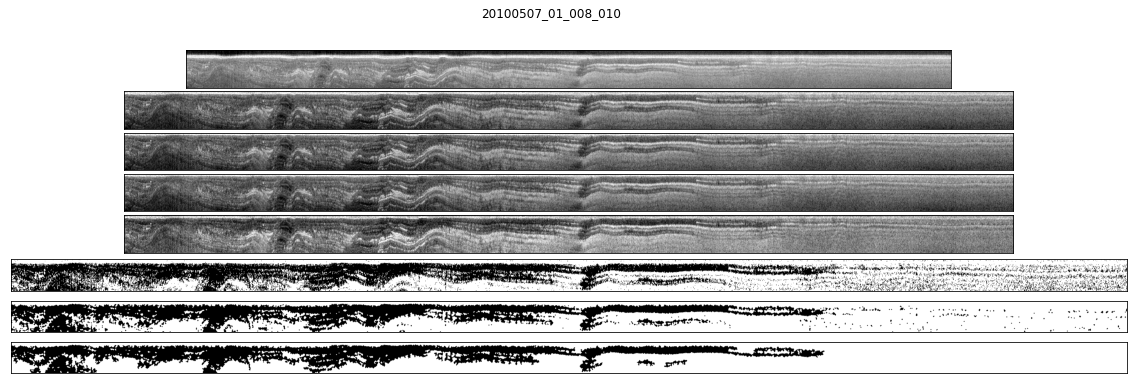

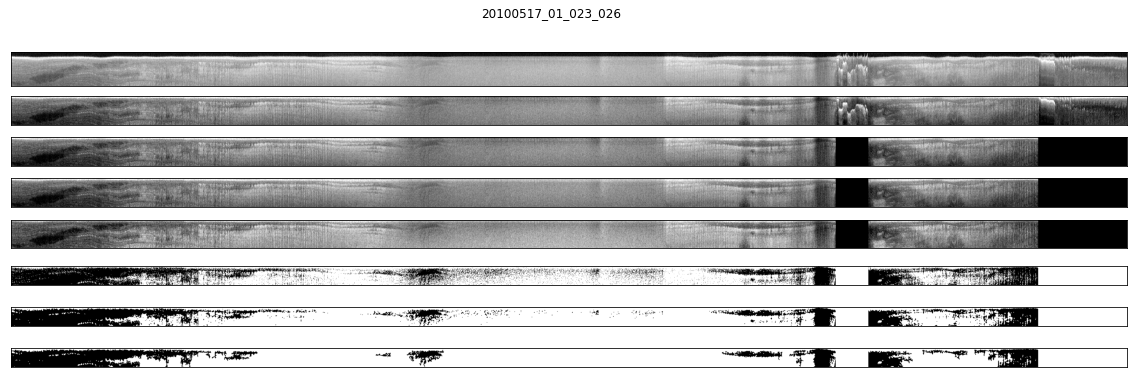

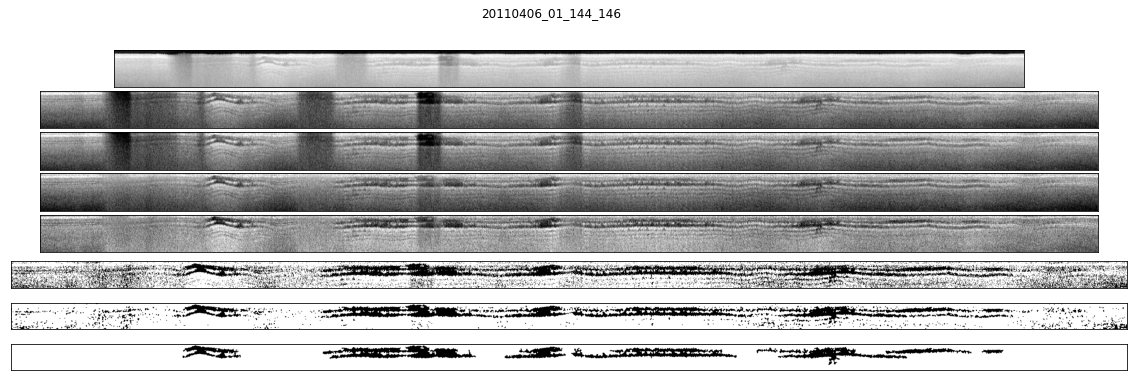

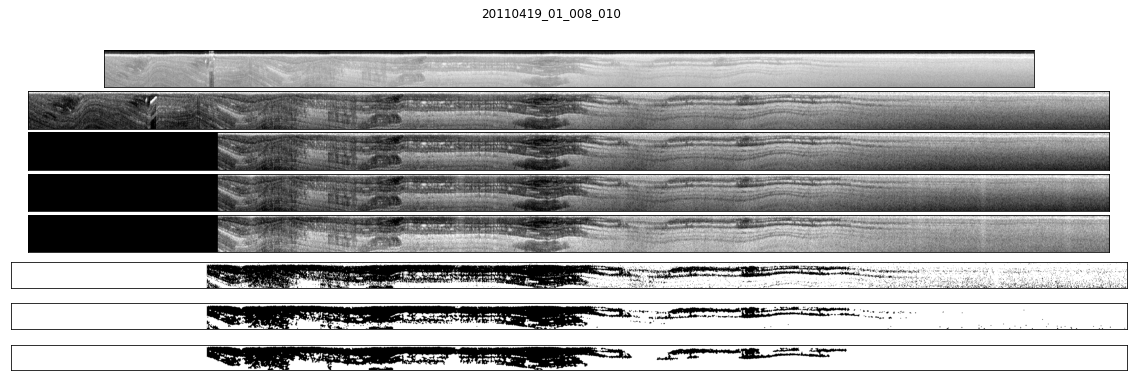

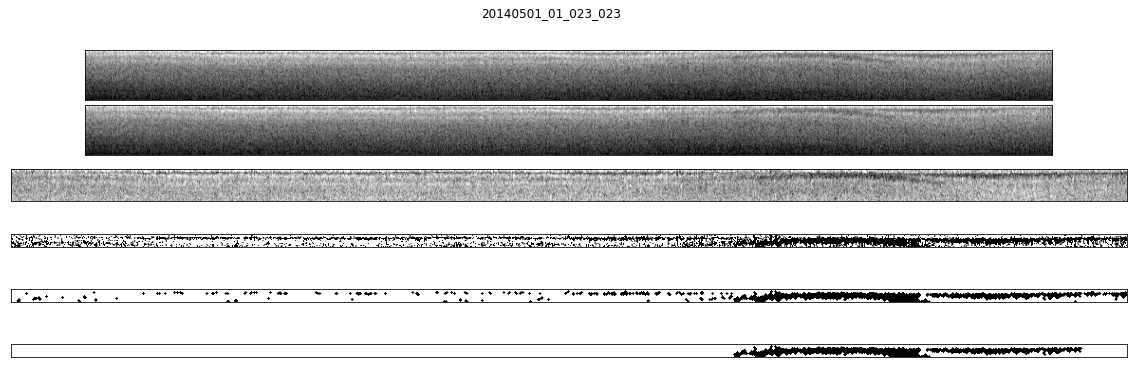

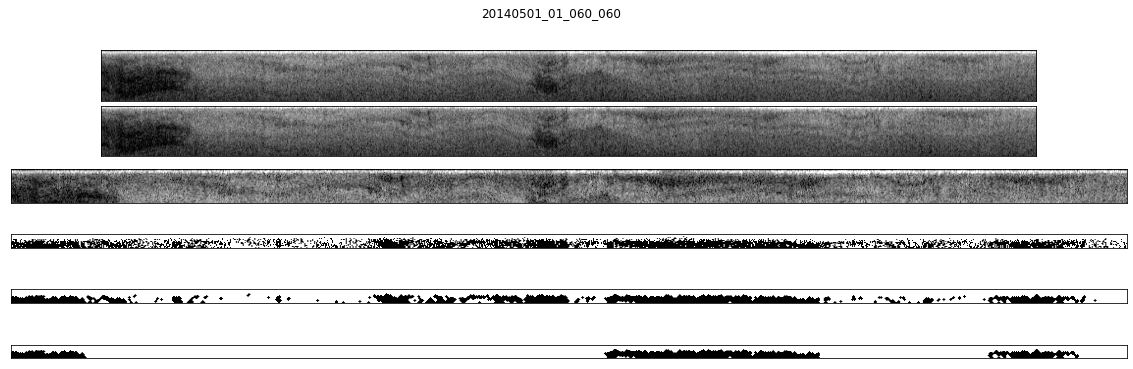

In [3]:
#Define the files location
path= 'C:/Users/jullienn/Documents/working_environment/iceslabs_MacFerrin/icelens_identification'
folder_days = [f.name for f in os.scandir(path) if f.is_dir() ]

for day in folder_days:
    path_day=path+'/'+day
    #onlyfiles = [f for f in listdir(path_day) if isfile(join(path_day, f))]
    if (day=='potential_iceslabs'):
        continue
    if (day[0:4]=='2014'):
        #Prepapre the figure
        fig, axs = plt.subplots(6,1, figsize=(20, 6), facecolor='w', edgecolor='k')
        fig.suptitle(day)
        fig.subplots_adjust(hspace = .1, wspace=.001)
        axs = axs.ravel()

        #Load and plot images

        #_5m_30m_ORIGINAL: does not exist for 2014
        
        #BESTFIT_V1: does not exist for 2014
        
        #Before roll correction
        ROLLCORRECT__BEFORE = Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")
        arr_ROLLCORRECT__BEFORE = np.asarray(ROLLCORRECT__BEFORE)
        axs[0].imshow(arr_ROLLCORRECT__BEFORE, cmap='gray', vmin=0, vmax=255)

        #After roll correction
        ROLLCORRECT_AFTER = Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")
        arr_ROLLCORRECT_AFTER = np.asarray(ROLLCORRECT_AFTER)
        axs[1].imshow(arr_ROLLCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #After depth correction
        XDEPTHCORRECT_AFTER = Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")
        arr_XDEPTHCORRECT_AFTER = np.asarray(XDEPTHCORRECT_AFTER)
        axs[2].imshow(arr_XDEPTHCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #orig_CUTOFF_045_THRESHOLD_000
        orig_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_orig_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_orig_CUTOFF_045_THRESHOLD_000 = np.asarray(orig_CUTOFF_045_THRESHOLD_000)
        axs[3].imshow(arr_orig_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_000
        SG1_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_000 = np.asarray(SG1_CUTOFF_045_THRESHOLD_000)
        axs[4].imshow(arr_SG1_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_350
        SG1_CUTOFF_045_THRESHOLD_350 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_350 = np.asarray(SG1_CUTOFF_045_THRESHOLD_350)
        axs[5].imshow(arr_SG1_CUTOFF_045_THRESHOLD_350, cmap='gray', vmin=0, vmax=255)

        #Remove axis ticks
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
        
    else:
        #Prepapre the figure
        fig, axs = plt.subplots(8,1, figsize=(20, 6), facecolor='w', edgecolor='k')
        fig.suptitle(day)
        fig.subplots_adjust(hspace = .1, wspace=.001)
        axs = axs.ravel()

        #Load and plot images

        #_5m_30m_ORIGINAL
        _5m_30m_ORIGINAL = Image.open(path_day+'/'+day+'_5m_30m_ORIGINAL.png').convert("L")
        arr_5m_30m_ORIGINAL = np.asarray(_5m_30m_ORIGINAL)
        axs[0].imshow(arr_5m_30m_ORIGINAL, cmap='gray', vmin=0, vmax=255)

        #BESTFIT_V1
        BESTFIT_V1 = Image.open(path_day+'/'+day+'_0m_30m_BESTFIT_V1.png').convert("L")
        arr_BESTFIT_V1 = np.asarray(BESTFIT_V1)
        axs[1].imshow(arr_BESTFIT_V1, cmap='gray', vmin=0, vmax=255)

        #Before roll correction
        ROLLCORRECT__BEFORE = Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")
        arr_ROLLCORRECT__BEFORE = np.asarray(ROLLCORRECT__BEFORE)
        axs[2].imshow(arr_ROLLCORRECT__BEFORE, cmap='gray', vmin=0, vmax=255)

        #After roll correction
        ROLLCORRECT_AFTER = Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")
        arr_ROLLCORRECT_AFTER = np.asarray(ROLLCORRECT_AFTER)
        axs[3].imshow(arr_ROLLCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #After depth correction
        XDEPTHCORRECT_AFTER = Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")
        arr_XDEPTHCORRECT_AFTER = np.asarray(XDEPTHCORRECT_AFTER)
        axs[4].imshow(arr_XDEPTHCORRECT_AFTER, cmap='gray', vmin=0, vmax=255)

        #orig_CUTOFF_045_THRESHOLD_000
        orig_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_orig_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_orig_CUTOFF_045_THRESHOLD_000 = np.asarray(orig_CUTOFF_045_THRESHOLD_000)
        axs[5].imshow(arr_orig_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_000
        SG1_CUTOFF_045_THRESHOLD_000 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_000.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_000 = np.asarray(SG1_CUTOFF_045_THRESHOLD_000)
        axs[6].imshow(arr_SG1_CUTOFF_045_THRESHOLD_000, cmap='gray', vmin=0, vmax=255)

        #SG1_CUTOFF_045_THRESHOLD_350
        SG1_CUTOFF_045_THRESHOLD_350 = Image.open(path_day+'/'+day+'_SG1_CUTOFF_-0.45_THRESHOLD_350.png').convert("L")
        arr_SG1_CUTOFF_045_THRESHOLD_350 = np.asarray(SG1_CUTOFF_045_THRESHOLD_350)
        axs[7].imshow(arr_SG1_CUTOFF_045_THRESHOLD_350, cmap='gray', vmin=0, vmax=255)

        #Remove axis ticks
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


Clearly ice slabs can be identified as the black features. Procedure looks to somehow fail for 2014.
## 3. Assessing the importance of roll corretion

Among my 2010-2014 subdataset, the traces '20110406_01_144_146' are the one showing strongest roll variation (from 0 to 20°). I choose this trace to illustrate the importance of roll correction on the data. This is also the same as the one chosen by MacFerrin et al., 2019 to illustrate his workflow on the supplentary material. I show also the traces '20100517_02_023_026'.

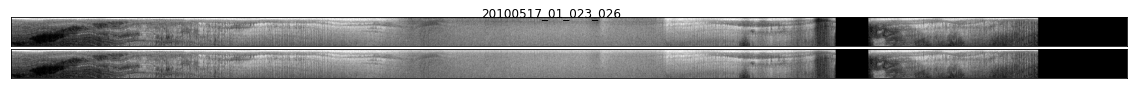

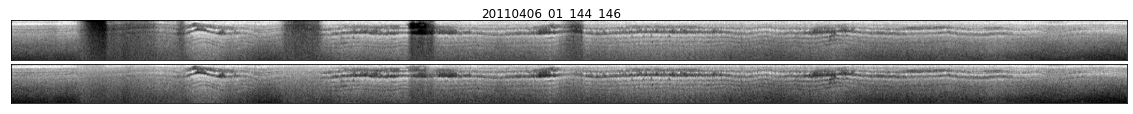

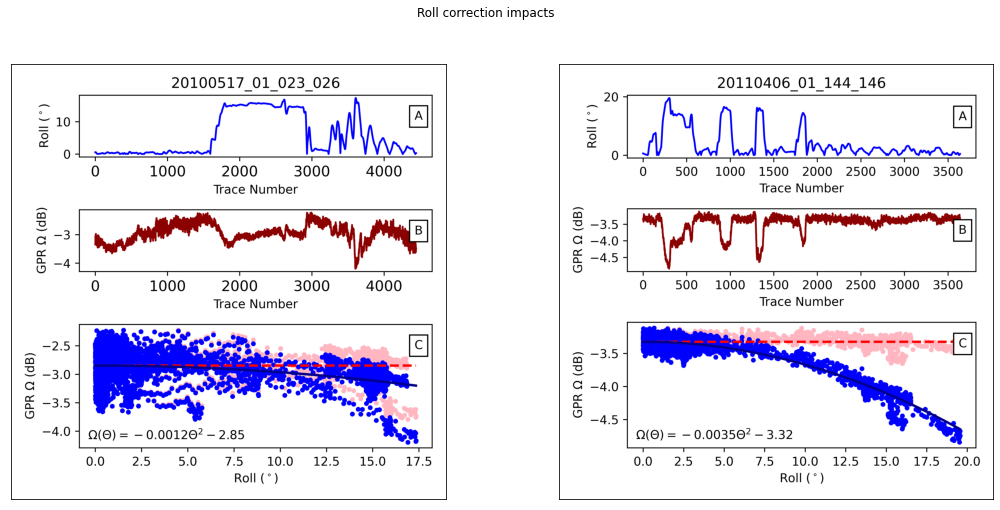

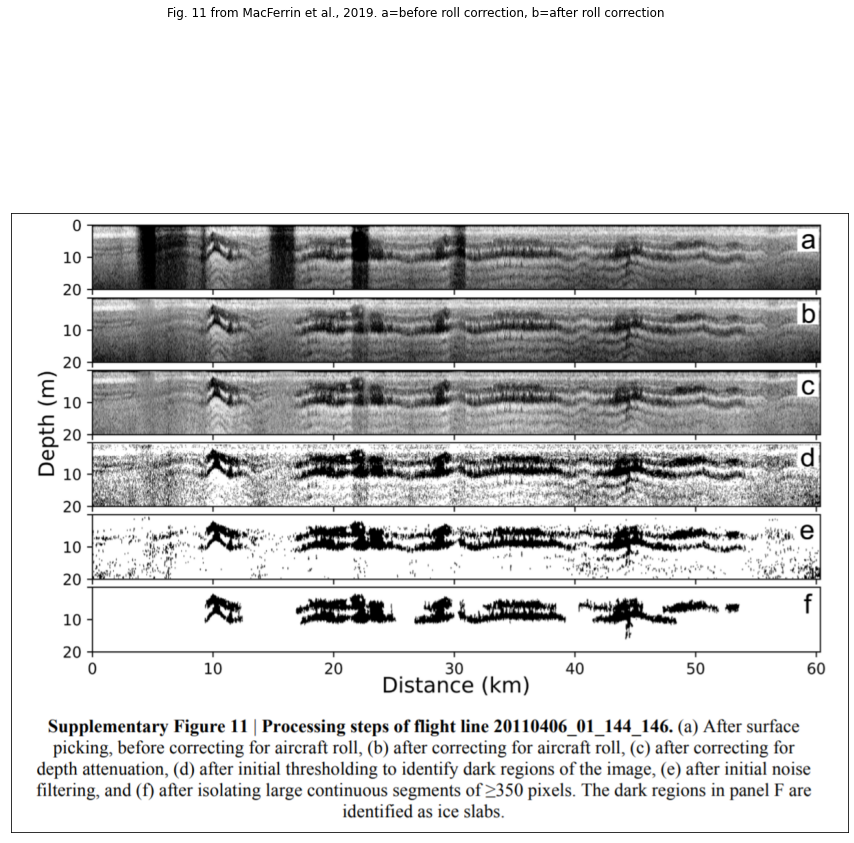

In [16]:
day='20100517_01_023_026'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.2), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After roll correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load roll correction impact figure
plt_roll_corr_20100517_01_023_026=mpimg.imread(path_day+'/'+day+'_PLOT_ROLLCORRECT_20m.png')


day='20110406_01_144_146'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT__BEFORE.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After roll correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load roll correction impact figure
plt_roll_corr_20110406_01_144_146=mpimg.imread(path_day+'/'+day+'_PLOT_ROLLCORRECT_20m.png')


#Plot roll correction impact images
#Prepare the figure
fig, axs = plt.subplots(1,2, figsize=(18, 8))#, facecolor='w', edgecolor='k')
fig.suptitle('Roll correction impacts')
#fig.subplots_adjust(hspace = .1, wspace=.1)
axs = axs.ravel()

#Before roll correction
axs[0].imshow(plt_roll_corr_20100517_01_023_026)
axs[1].imshow(plt_roll_corr_20110406_01_144_146)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


#Display Fig. 11 from supplementary materials from MacFerrin et al., 2019
fig11_MacFerrin=mpimg.imread(path+'/Fig11_supp_MacFerrin.png')

fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle('Fig. 11 from MacFerrin et al., 2019. a=before roll correction, b=after roll correction')
ax.imshow(fig11_MacFerrin)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()

From MacFerrin et al., 2019 (supplemenatry materials):
- "Aircraft roll (especially above 5°) causes off-nadir reflections of the AR signal and weakens the
returned signal"
- "IceBridge AR signal strength is weakened most when the roll of the aircraft is greater than 5°"
- "Additionally, a roll-dependent weakening of the signal depends upon depth below the physical surface. Radar returns become weaker at depth regardless of aircraft roll. We performed a depth dependent roll-correction to accurately normalize the GPR data and negate roll-dependent weakening of the signal."
As far as I understood, the roll correction taked into account the influence of depth for correction the signal. However, there is an additional depth correction to consider (See point 3.).

The roll of the aircraft have the consequence to decrease the radar signal in the echogram. The roll correction aims to correct for this bias. Correction for air craft roll attenuate (if not erase) the darker regions in the traces. These vertical darker bands are sharp, thus well visible in raw data, and can be easily be identified.
#### Conclusion for roll correction: this can be ignored for 2002-2003 dataset as these bands can easily be identified, and does not prevent from identifying ice lenses/slabs.

## 4. Assessing the importance of depth correction because of depth attenuation

Among my 2010-2014 subdataset, I continue to show the traces '20110406_01_144_146'. I choose this trace to illustrate the importance of depth correction on the data. This is also the same as the one chosen by MacFerrin et al., 2019 to illustrate his workflow on the supplentary material. I show also the traces '20100507_01_008_010' rather than '20100517_02_023_026'. (the latter being used for roll correction illustration) because the influence is more striking for the former compared to the latter.

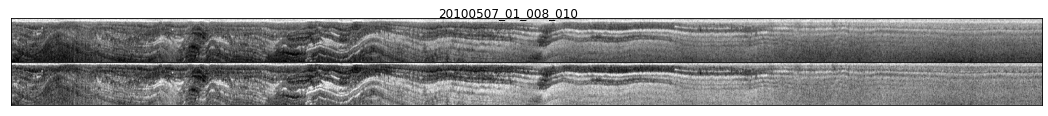

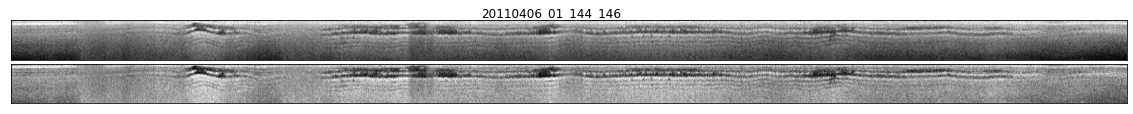

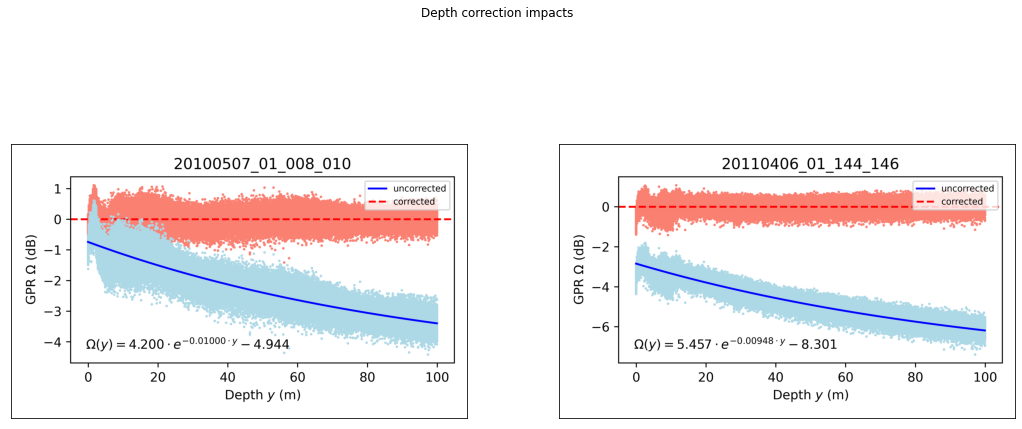

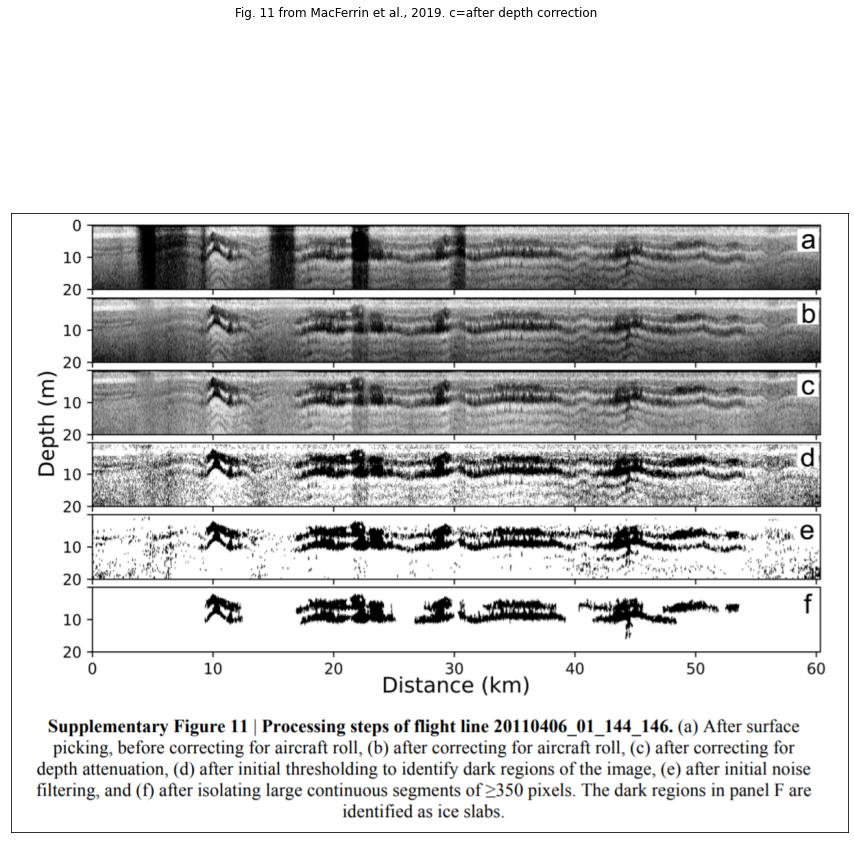

In [20]:
day='20100507_01_008_010'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After depth correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load depth correction impact figure
plt_depth_corr_20100507_01_008_010=mpimg.imread(path_day+'/'+day+'_DEPTH_CURVE_PLOT.png')


day='20110406_01_144_146'
path_day=path+'/'+day

#Prepapre the figure
fig, axs = plt.subplots(2,1, figsize=(20, 1.6), facecolor='w', edgecolor='k')
fig.suptitle(day)
fig.subplots_adjust(hspace = .001, wspace=.001)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(np.asarray(Image.open(path_day+'/'+day+'_ROLLCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)
#After depth correction
axs[1].imshow(np.asarray(Image.open(path_day+'/'+day+'_XDEPTHCORRECT_AFTER.png').convert("L")), cmap='gray', vmin=0, vmax=255)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

#Load depth correction impact figure
plt_depth_corr_20110406_01_144_146=mpimg.imread(path_day+'/'+day+'_DEPTH_CURVE_PLOT.png')


#Plot depth correction impact images
#Prepare the figure
fig, axs = plt.subplots(1,2, figsize=(18, 8))#, facecolor='w', edgecolor='k')
fig.suptitle('Depth correction impacts')
#fig.subplots_adjust(hspace = .1, wspace=.1)
axs = axs.ravel()

#Before depth correction
axs[0].imshow(plt_depth_corr_20100507_01_008_010)
axs[1].imshow(plt_depth_corr_20110406_01_144_146)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


#Display again Fig. 11 from supplementary materials from MacFerrin et al., 2019
fig11_MacFerrin=mpimg.imread(path+'/Fig11_supp_MacFerrin.png')
fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle('Fig. 11 from MacFerrin et al., 2019. c=after depth correction')

ax.imshow(fig11_MacFerrin)

#Remove axis ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()

See '20100507_01_008_010': The ice slabs at the subsurface at the second half on the right hand side is much darker after depth correction than before. As a general remark, the depth correction renders the top layer darkers and the bottom layers brighter as they were before the depth correction. Without depth correction, there might be a confusion of where the slabs are: one could argue that the are located to the bottom on the left hand side for '20100507_01_008_010' (see top subplot) whereas they are located to the top (see bottom subplot) (see also Fig.1). The signal is very clear for '20110406_01_144_146' and no confusion is possible.

From MacFerrin et al., 2019, supplementary materials:
- "AR return signals in firn and ice get weaker with depth, consistent with Beer’s Law for electromagnetic waves propagating through an attenuating medium49. To homogenize the radar  signal with respect to depth, we fit a scatterplot of the top 100 meters in each flight line to an exponential decay curve"


#### Conclusion for depth correction: there might be a confusion in identifying features as being ice lenses/slabs in some traces for not taking into account the attenuation of the signal with depth. One could miss ice slabs at the subsurface, and wrongly attribute deep features as being ice slabs. Knowing this bias, I think it should still be possible to roughly identify slabbing.

## 5. Checking the surface identified by MacFerrin
The goal here is to check if Mike takes the surface as being identified by the algorithm or if he is taking a few pixel above (or below) this identified surface. This is a question I ask to myself because it may influence of internal layering display on my plots (2002-2003). By going into the code, as far as I understood he does not do that! The slice is taken from the surface directly. Let's verify by displaying some figure from '20100507_01_008_010'.

5m_30m_ORIGINAL:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_5m_30m_ORIGINAL.png">

5m_30m_BESTFIT_DOTTED_LINE:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_5m_30m_BESTFIT_DOTTED_LINE.png">

0m_30m_BESTFIT_V1:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_0m_30m_BESTFIT_V1.png">

ROLLCORRECT__BEFORE:
<img src="icelens_identification/20100507_01_008_010/20100507_01_008_010_ROLLCORRECT__BEFORE.png">

It is difficult to spot that on the figures, but I would conclude that this is not the case. The bright surface remains here, and that is what matters in the question I am asking to myself!

### 6. Show slices with potential ice slabs in it (raw slices and cutted slices)

Thanks to this kind of plot, I have identified the areas where ice slabs are potentially present using Fig.2a) from MacFerrin et al., 2019. I have created a file storing all the dates and traces where I might expect ice slabs (file 'potential_iceslabs.txt' in folder '2002_2003_slice_and_loc').
<img src="2002_2003_slice_and_loc/jun04_02proc_4.mat.png">

#### 6.a Quick visualisation of raw slice radar signal in:   
1. Dry snow zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_27_aggregated.png">

2. Percolation zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_37_aggregated.png">

3. Ablation zone
<img src="2002_2003_slice_and_loc/not_scaled_slices/may11_03_40_aggregated.png">

It is important to note the variation of the signal strength:
1. Dry snow zone: [~ -3.2;~ +3.2]
2. Percolation zone: [~ -2.2;~ +2.7]
3. Ablation zone: [~ -4.4;~ +4.4]

#### 6.b Step to show slices:
1. Show raw radar signal. As just shown, the signal strength changes from trace to trace, thus not very useful for comparison between traces

<img src="2002_2003_slice_and_loc/not_scaled_slices/may12_03_36_aggregated.png">

2. Apply thresholding scaling procedure from MacFerrin et al., 2019 (_export_to_8bit_array) to be able to compare traces between each other. However we do not get rid of the signal vairiation betwwen the different traces!
    - Define the minimum and maximum ranges:
        - range_min = 0
        - range_max = 2**8 - 1
    - Choose the percentiles:
        - percentile_min = 0.5%
        - percentile_max = 99.5%
    - Scale the radar echogram:
        - export_array_rescaled = (array - percentile_min) / (percentile_max - percentile_min) * range_max
    - Round the scaled radar echogram to integer values
    - Saturate the top and bottom:
        - export_array_rescaled < range_min = range_min
        - export_array_rescaled > range_max = range_max

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated.png">

3. The surface being too bright, I tried to remove it to make appear ice slabs in the subsurface. This is to what it looks like (see next figure: I selected a slice from 4 meters below the surface down to 30m. Note that the y ticks are not display correctly!). However, I find it not very optimal to remove the surface, so I decided to keep it. To make the subsurface more visible, I modify the percentiles in the scaling procedure so that the subsurface is more clear (though the surface colors are overshoot, but it does not matter so much).

<img src="2002_2003_slice_and_cutted_slice/may12_03_36_aggregated.png">

4. The 0.5-99.5% gave not very satisfying result to quickly spot iceslabs -> modify the threshold from 0.5-99.5% to 5-95% gives much more clear and easily spottable features:

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95.png">

I have the feeling the last option seems to be enough to spot ice lenses/slabs while keeping the surface. I will keep this one. Maybe one can argue to play a bit with the threshold to optmize the display of the subsurface, but that's of second order matter.

#### 6.c Let's display some radar slices (0 to 30m), using the plotting procedure decribes in point 5.b.5. I focus on SW Greenland so far, and display several slices that stroked me by quick visualisation (non exhaustive list). I display 'slice_and_loc' figures:

<img src="2002_2003_slice_and_loc/jun04_02proc_4.mat_5_95.png">

<img src="2002_2003_slice_and_loc/may09_03_1_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may11_03_12_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_41_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_1_aggregated_5_95.png">

<img src="2002_2003_slice_and_loc/may12_03_2_aggregated_5_95.png">

### 7. Implementation of depth correction to the traces.
After discussion with Andrew on January 15th 2021, the correction for depth of the radar echogram is desirable. Here is the result of its implementation, and what are the implication comparing to before its implementation.

1. Generation of the figures before VS after the depth correction, plotted with min (resp. max) range equal to the 0.5% percentile (resp. 99.5% percentile). I did have a look at all the figures in the depth_correction folder.

Before the depth correction, percentiles [0.5% ; 99.5%]
<img src="depth_correction/may12_03_36_aggregated_05_995_before_depth_corr.png">

After the depth correction, percentiles [0.5% ; 99.5%]
<img src="depth_correction/may12_03_36_aggregated_05_995_after_depth_corr.png">

Influence of the depth correction on radar signal
<img src="depth_correction/may12_03_36_DEPTH_CURVE_PLOT.png">

Some conclusions: for the [0.5% ; 99.5%] percentiles plot, I have the feeling it is just rendering the slice brighter. For some traces however, it seems to render the surface darker and the subsurface brighter (see the 2 next figures for jun04_02_34):

Before the depth correction, percentiles [0.5% ; 99.5%]
<img src="depth_correction/jun04_02proc_34.mat_05_995_before_depth_corr.png">

After the depth correction, percentiles [0.5% ; 99.5%]
<img src="depth_correction/jun04_02proc_34.mat_05_995_after_depth_corr.png">

2. Generation of the figures after the depth correction (the one before the depth correction were already generated), plotted with min (resp. max) range equal to the 5% percentile (resp. 95% percentile). I did have a look at all the figures in the 2002_2003_slice_and_loc folder.

Before the depth correction, percentiles [5% ; 95%]
<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95.png">

After the depth correction, percentiles [5% ; 95%]
<img src="2002_2003_slice_and_loc/may12_03_36_aggregated_5_95_after_depth_corr.png">

Some conclusions: for the [0.5% ; 99.5%] percentiles plot, I have the feeling it is just rendering the slice brighter: this pattern replicates for almost all the traces, expect for may 24 2002 and may 30 2002, where the change in color is not so important (if not negligible). I had a look at all the figures 'date_aggregated_5_95' and 'date_aggregated_5_95_after_depth_corr' in 2002_2003_slice_and_loc folder.

For some traces however, it seems to render the surface darker and the subsurface brighter (see the 2 next figures for may_15_0):

Before the depth correction, percentiles [5% ; 95%]
<img src="2002_2003_slice_and_loc/may15_03_0_aggregated_5_95.png">

After the depth correction, percentiles [5% ; 95%]
<img src="2002_2003_slice_and_loc/may15_03_0_aggregated_5_95_after_depth_corr.png">

#### General conclusions about the depth correction:
1. The depth correction did not lead to the expected results looking at the difference in the radar signal between the traces before VS after the depth correction.
2. The correction for depth attenuation seems to be minor.
3. Furthermore, it looks like the depth corrected traces are simply brighther compared to the non-depth corrected traces. It might improved ice slabs visualisation for the plot [0.5% ; 99.5%], but decrease the ice features spotability for the plot [5% ; 95%].
4. However for a few cases, the surface is indeed darker in the former compared to the later case, and the subsurface is brighther in any cases.

=> To me, the depth correction does not seems to bring important value, and might be misleading in the ice lenses/slabs identification as it renders the whole slice brighther for the plot [5% ; 95%].

### 8. Excess melt plot
I have plotted the excess melt MARv3.11.2-6km-ERA5. See file 'calculate_mar_excess_melt.txt' in C:\Users\jullienn\Documents\working_environment\excess_melt to know more about the excess melt calculations

I plot, for any traces, the location of the traces over the GrIS topography, the location of the traces over the excess melt of the previous year when  the track was acquired, and the 0-30m radar slice, color shading rescaled, without depth correction. Here are a few example for areas where I suspect ice slabs:

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2001_jun04_02proc_4.mat.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may09_03_1.png">

Start = right hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_36.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_1.png">

Start = left hand side
<img src="../excess_melt/figures_excess_melt/potential_iceslabs/year_2002_may12_03_2.png">


### Question to ask in the group meeting:
- After having had a look at the potential ice slabs excess melt plots, there might be a need to refine the 'potential_ice_slabs.txt' file. Consider potential ice slabs areas where excess melt is higher than 200 mm w.e./year?
- I would like to have the information related to the exess melt of the - let's say - 5 years before the data collection. How to do that? What about cumulative excess melt plot?